# Explore and Clean Dataset

In [1]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\kirst\appdata\local\continuum\anaconda3\lib\site-packages (0.7.0)


In [2]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV

In [3]:
# Use pandas to read CSV file
data = pd.read_csv('../data/germanHeaders.csv', header=None)

# Data file read with number header and index column
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,0.0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,1.0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,2.0,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,3.0,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,996.0,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,997.0,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,998.0,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
# Store column names
columns = data.iloc[0].tolist()
data.columns = columns

# Drop number headers and replace with descriptive headers
data = data.iloc[1:]

# Drop Nan column
data = data.iloc[:,1:]

# Drop columns that should not impact risk 
data = data.drop(['foreign_worker', 'telephone', 'liable_for', 'personal_status_sex'], axis=1)

data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,debtors/guarantors,present_residence_since,property,age,other_installment_plans,housing,credits,job,good/bad
1,A11,6,A34,A43,1169,A65,A75,4,A101,4,A121,67,A143,A152,2,A173,1
2,A12,48,A32,A43,5951,A61,A73,2,A101,2,A121,22,A143,A152,1,A173,2
3,A14,12,A34,A46,2096,A61,A74,2,A101,3,A121,49,A143,A152,1,A172,1
4,A11,42,A32,A42,7882,A61,A74,2,A103,4,A122,45,A143,A153,1,A173,1
5,A11,24,A33,A40,4870,A61,A73,3,A101,4,A124,53,A143,A153,2,A173,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12,A32,A42,1736,A61,A74,3,A101,4,A121,31,A143,A152,1,A172,1
997,A11,30,A32,A41,3857,A61,A73,4,A101,4,A122,40,A143,A152,1,A174,1
998,A14,12,A32,A43,804,A61,A75,4,A101,4,A123,38,A143,A152,1,A173,1
999,A11,45,A32,A43,1845,A61,A73,4,A101,4,A124,23,A143,A153,1,A173,2


In [5]:
# Remove any attribute data that contains "A"
data = data.replace({'A':''}, regex=True)

# Update outcome column where bad=0 and good=1
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [6]:
# Update all data types in dataframe from string to numeric
data = data.apply(pd.to_numeric) 

# Check data type of dataframe (now integer)
data.dtypes

account_status             int64
duration                   int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_account            int64
unemployed                 int64
installment_rate           int64
debtors/guarantors         int64
present_residence_since    int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
credits                    int64
job                        int64
good/bad                   int64
dtype: object

In [7]:
# Save new CSV with proper formatting (optional)
# data.to_csv('cleandata_woutcome.csv')

# Assign variables, sample, scale

In [8]:
# Assign attributes to X and outcome to y
X = data.drop("good/bad", axis=1)
y = data["good/bad"]
attribute_names = X.columns
#X.head()

# Check outcome counts
y.value_counts()

1    700
0    300
Name: good/bad, dtype: int64

In [9]:
# Adjust sampling to make outcomes comparable

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [10]:
# Split into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

# Check new sample counts for training data
y_train.value_counts()

0    527
1    523
Name: good/bad, dtype: int64

In [11]:
# Import dependencies to scale
from sklearn.preprocessing import StandardScaler

# Scale attribute data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [12]:
# Import SVM dependencies
from sklearn.svm import SVC

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Test Acc: %.3f' % model.score(X_test,y_test))

Test Acc: 0.714


In [13]:
# Assign predictions to variable
predictions = model.predict(X_test)

# Chart predictions and actual
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
345,1,1
346,1,1
347,0,1
348,1,1


In [14]:
# Import classification report and print
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions,
                            target_names=["bad","good"]))

              precision    recall  f1-score   support

         bad       0.69      0.76      0.72       173
        good       0.74      0.67      0.70       177

    accuracy                           0.71       350
   macro avg       0.72      0.71      0.71       350
weighted avg       0.72      0.71      0.71       350



# GridSearch

In [15]:
# Import dependencies and test parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
             'gamma': [0.0001, 0.005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.710, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.724, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.776, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.710, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.005, score=0.724, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.776, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.733, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.710, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.724, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.776, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[CV] ................... C=50, gamma=0.005, score=0.710, total=   0.4s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.733, total=   0.6s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.724, total=   0.7s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.771, total=   0.4s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.733, total=   0.5s
[CV] C=50, gamma=0.001 ...............................................
[CV] ................... C=50, gamma=0.001, score=0.710, total=   0.4s
[CV] C=50, gamma=0.001 ...............................................
[CV] ................... C=50, gamma=0.001, score=0.733, total=   0.6s
[CV] C=50, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   14.6s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.005, 0.001, 0.005]},
             verbose=3)

In [16]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7352380952380952


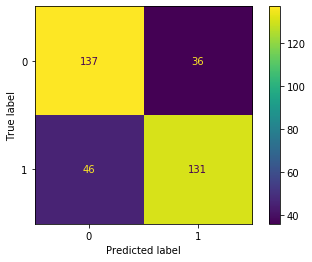

In [18]:
# Import dependencies and plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

clf = SVC(random_state=1)
clf.fit(X_train, y_train)
SVC(random_state=1)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()